Kalman Filter

1) calculates initial belief
2) 



Example:
A target is moving in a 2D plane. The ownship position is known and fixed at the origin. we have access to noisy measurements that directly observe the target 2D coordinates at any time step.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class kalman_filter:
    def __init__(self, model, init):
        self.A = model.A # system matrix ###model['A']
        self.B = model.B # input matrix
        self.H = model.H # measurement matrix
        self.Q = model.Q # process noise covariance
        self.R = model.R # measurement noise covariance
        self.x = init.x  # state vector
        self.Sigma = init.Sigma # state covariance

    def predict(self, u):
        # Predict the next state
        self.x_pred = self.A @ self.x + self.B @ u
        self.Sigma_pred = self.A @ self.Sigma @ self.A.T + self.Q
    
    def update(self, z):
        # Compute the Kalman gain
        self.v = z - self.H @ self.x_pred
        self.S = self.H @ self.Sigma_pred @ self.H.T + self.R
        self.K = self.Sigma_pred @ self.H.T @ np.linalg.inv(self.S)

        # Update the state estimate and covariance
        self.x = self.x_pred + self.K @ self.v
        I = np.eye(self.Sigma.shape[0])
        self.Sigma = (I - self.K @ self.H) @ self.Sigma_pred @ (I - self.K @ self.H).T + self.K @ self.R @ self.K.T


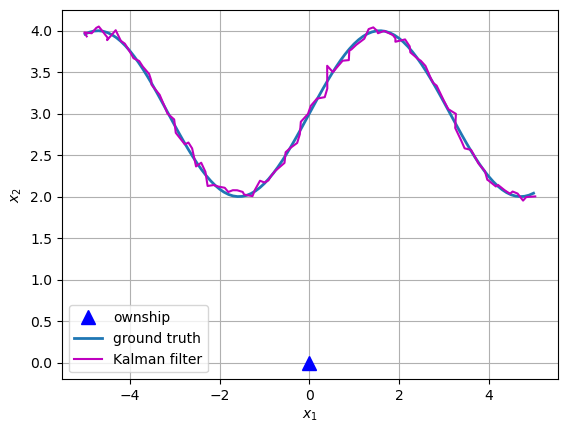

In [22]:
class myStruc:
    pass

# ground truth
gt = myStruc()
gt.x = np.arange(-5, 5.1, 0.1)
gt.y = np.array(1 * np.sin(gt.x) + 3)

# measurement
R = np.diag(np.power([0.05, 0.05], 2))  # measurement noise covariance
# Cholesky factor of covariance matrix
L = np.linalg.cholesky(R)
z = np.zeros([2, len(gt.x)])

for i in range(len(gt.x)):
    # smaple from zero mean Gaussian with covariance V
    noise = (L @ np.random.randn(2, 1)).reshape(-1)
    z[:,i] = np.array([gt.x[i], gt.y[i]]) + noise

# build model
model = myStruc()
model.A = np.array([[1, 0], [0, 1]])  # state transition matrix
model.B = np.array([[0, 0], [0, 0]])  # input matrix (no control input)
model.H = np.array([[1, 0], [0, 1]])  # measurement matrix
model.Q = np.diag([0.01, 0.01])  # process noise covariance
model.R = np.diag(np.power([0.05, 0.05], 2))

# initial state
init = myStruc()
init.x = np.zeros([2, 1])  # initial state vector
init.x[0, 0] = z[0, 0]  # initial x position
init.x[1, 0] = z[1, 0]  # initial y position
init.Sigma = np.diag([2, 2])  # initial state covariance

kf = kalman_filter(model, init)
x = []
x.append(init.x) # state
for i in range(1, np.shape(z)[1], 1):
    kf.predict(np.zeros([2, 1]))  # no control input
    kf.update(z[:, i].reshape([2, 1]))  # update with measurement
    x.append(kf.x)  # store the state

x = np.array(x)

# plot
fig = plt.figure()
line1, = plt.plot(0, 0, '^', color='b', markersize=10, label='Ownship')
line2, = plt.plot(gt.x, gt.y, '-', linewidth=2)
line3, = plt.plot(x[:, 0, :], x[:, 1, :], '-m', linewidth=1.5)
plt.legend([line1, line2, line3], [r'ownship', r'ground truth', r'Kalman filter'], loc='best')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(True)
plt.show()